<img src="https://cdn.comet.ml/img/notebook_logo.png">

[Comet](https://www.comet.com/site/products/ml-experiment-tracking/?utm_source=comet-examples&utm_medium=referral&utm_campaign=github_repo_2023&utm_content=openai) is an MLOps Platform that is designed to help Data Scientists and Teams build better models faster! Comet provides tooling to track, Explain, Manage, and Monitor your models in a single place! It works with Jupyter Notebooks and Scripts and most importantly it's 100% free to get started!

[OpenAI](https://openai.com) is an AI research and deployment company. Their mission is to ensure that artificial general intelligence benefits all of humanity. This example showcase Comet support for [OpenAI capabilities to understand images](https://platform.openai.com/docs/guides/vision).

Instrument your runs with Comet to start managing experiments and log prompts iterations for faster and easier reproducibility and collaboration.

[Find more information about our integration with OpenAI](https://www.comet.com/docs/v2/integrations/third-party-tools/openai/?utm_source=comet-examples&utm_medium=referral&utm_campaign=github_repo_2023&utm_content=openai)

Curious about how Comet can help you build better models, faster? Find out more about [Comet](https://www.comet.com/site/products/ml-experiment-tracking/?utm_source=comet-examples&utm_medium=referral&utm_campaign=github_repo_2023&utm_content=openai) and our [other integrations](https://www.comet.com/docs/v2/integrations/overview/?utm_source=comet-examples&utm_medium=referral&utm_campaign=github_repo_2023&utm_content=openai)

Get a preview for what's to come. Check out a completed project created from this notebook [here](https://www.comet.com/examples/comet-example-openai-llm-notebook/prompts?utm_source=comet-examples&utm_medium=referral&utm_campaign=github_repo_2023&utm_content=openai).


# Install Dependencies

In [ ]:
%pip install "comet_llm>=2.0.2" "openai>=1.1.0"

# Initialize Comet

In [ ]:
import comet_llm

comet_llm.init(project="comet-example-openai-vision-llm-notebook")

# Set-up your OpenAI Key


Get your [OpenAI API Key](https://platform.openai.com/account/api-keys) and paste it below:

In [ ]:
import os

os.environ["OPENAI_API_KEY"] = "..."

# Import Dependencies

In [ ]:
from openai import OpenAI

client = OpenAI()

# Describe a single image

OpenAI Vision model can describe objects that are contained in an image:

In [ ]:
response = client.chat.completions.create(
    model="gpt-4-vision-preview",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "What’s in this image?"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
                    },
                },
            ],
        }
    ],
    max_tokens=300,
)

print(response.choices[0])

Our OpenAI integration seamlessly detects your content and enables you to effortlessly visualize images directly within the Comet Dashboard:

![Single Image in chain![Screenshot 2024-02-29 at 11-22-27 Comet.ml - Supercharging Machine Learning.png](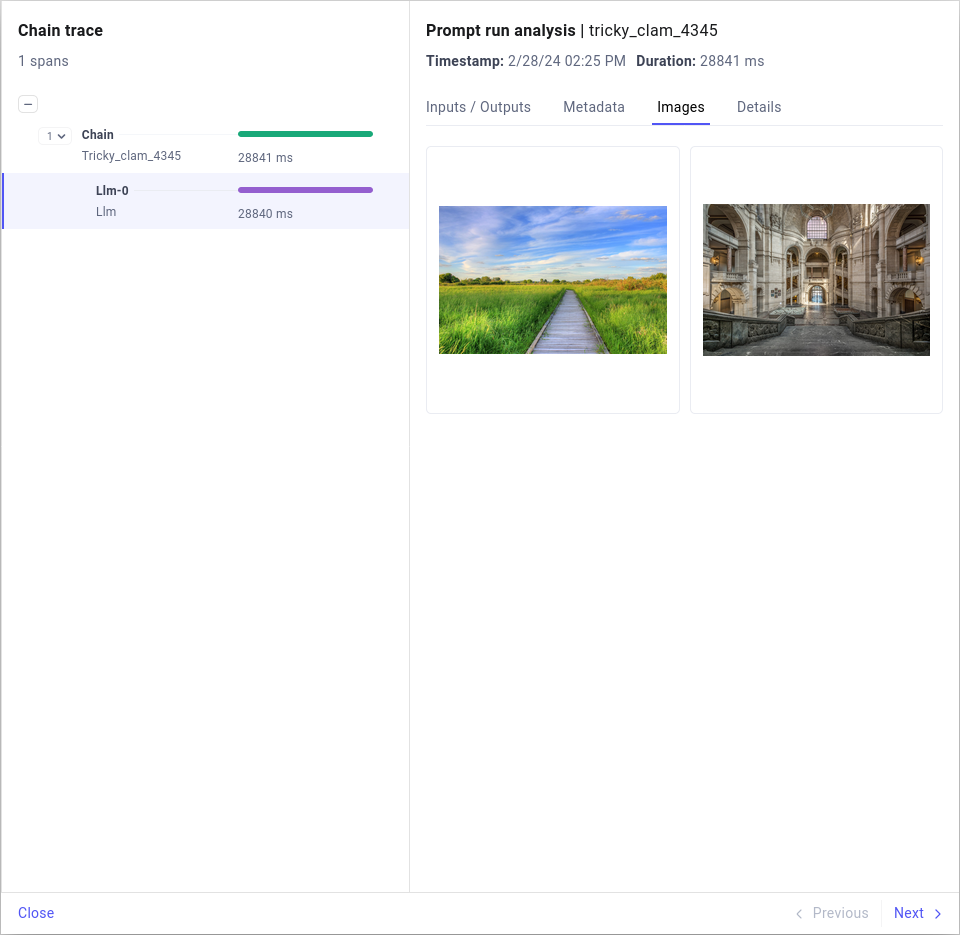![Screenshot 2024-02-29 at 11-22-27 Comet.ml - Supercharging Machine Learning.png](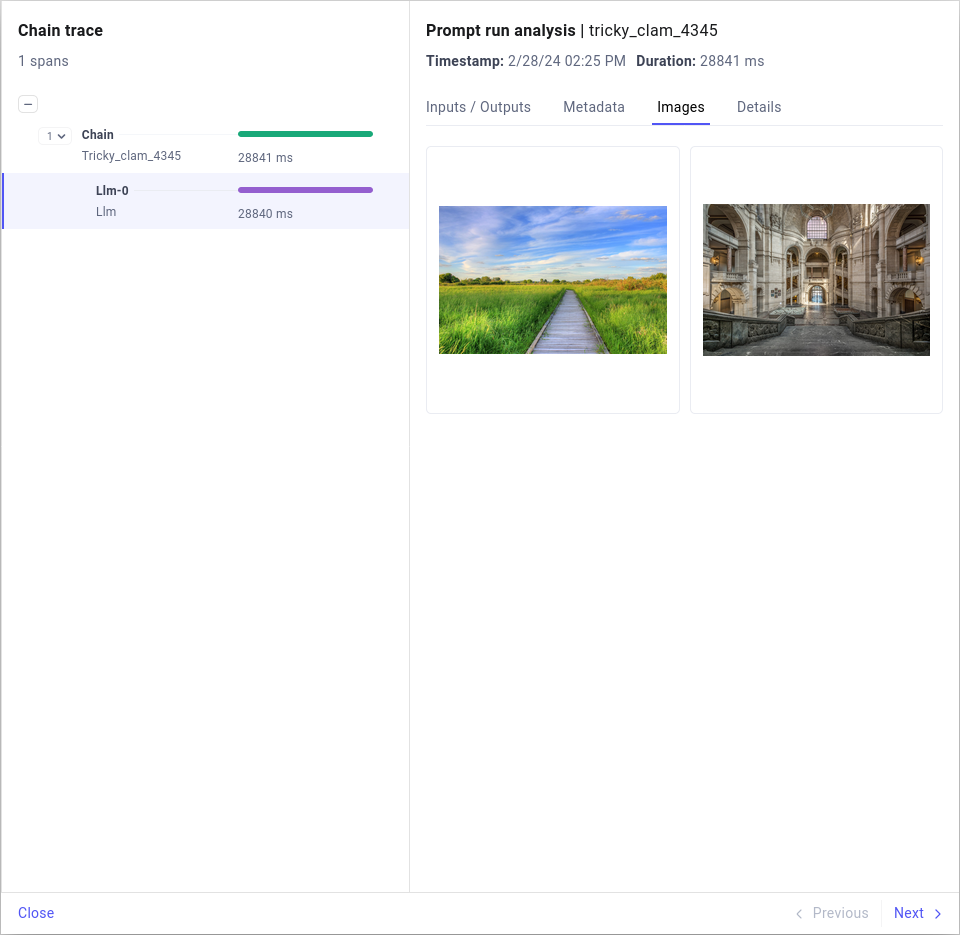![Screenshot 2024-02-29 at 11-22-27 Comet.ml - Supercharging Machine Learning.png](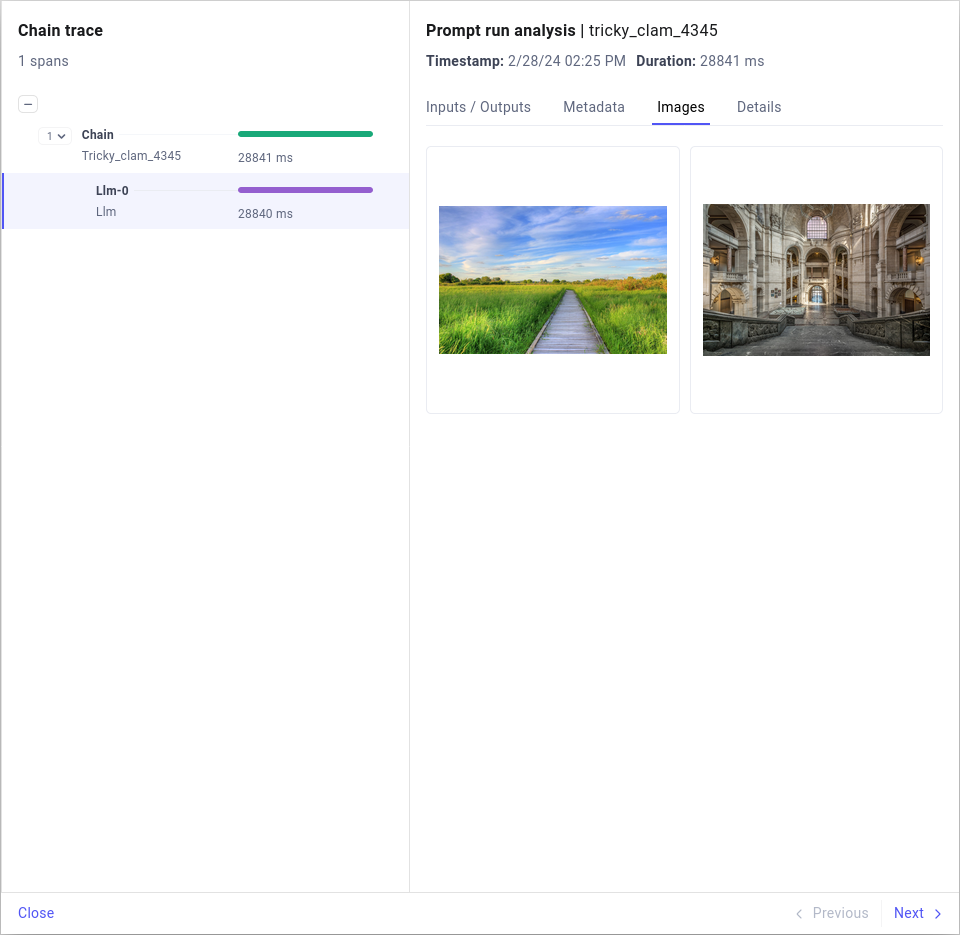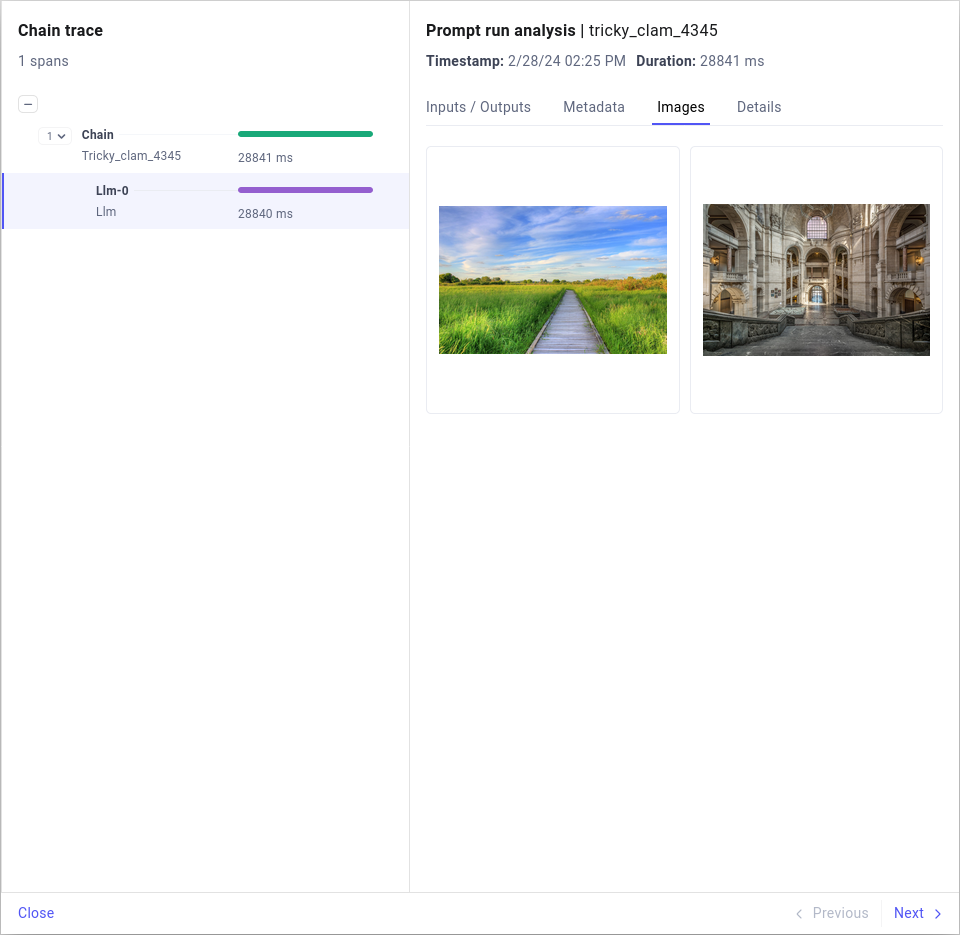)))](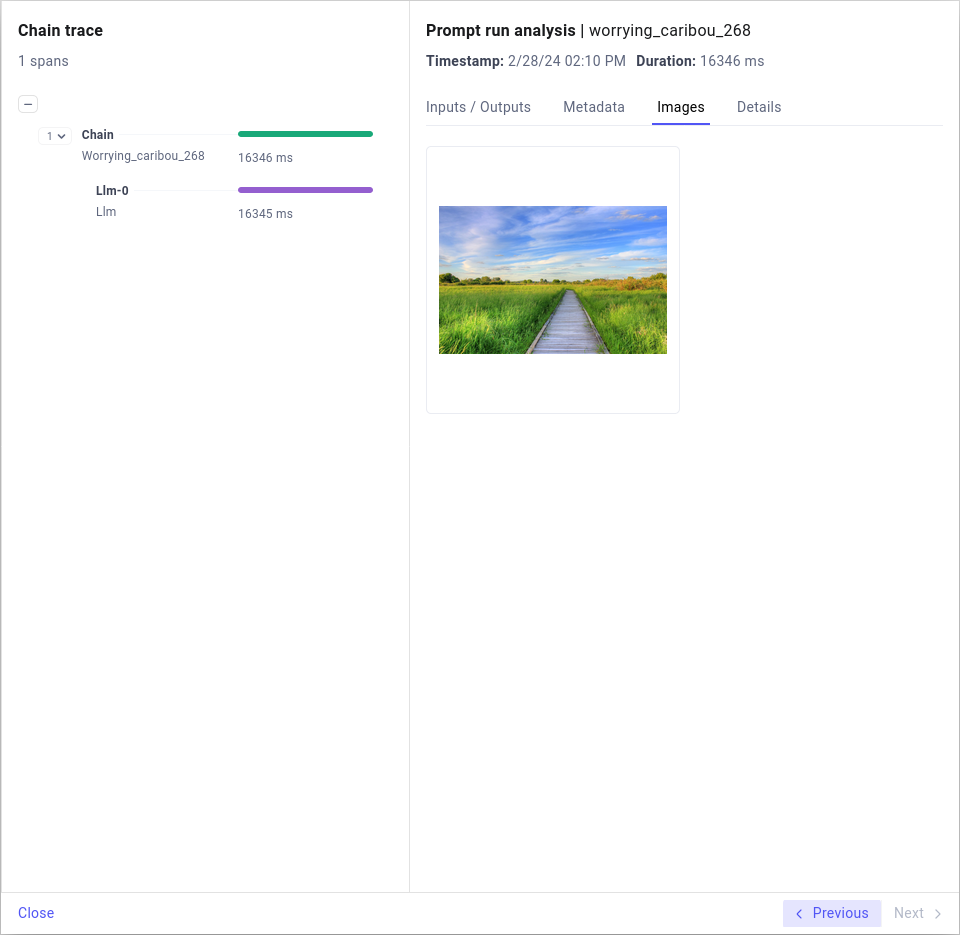)

# Compare multiple images

OpenAI Vision can also compare multiple images:

In [ ]:
images = [
    "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/Neues_Rathaus_Hannover%2C_Innenansicht.jpg/1920px-Neues_Rathaus_Hannover%2C_Innenansicht.jpg",
]

comet_llm.start_chain({"images": images})

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "What’s in this first image?"},
            {"type": "image_url", "image_url": {"url": images[0]}},
        ],
    },
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "What’s in this second image?"},
            {"type": "image_url", "image_url": {"url": images[1]}},
        ],
    },
    {"role": "user", "content": "What is the difference between the two images?"},
]

response = client.chat.completions.create(
    model="gpt-4-vision-preview",
    messages=messages,
    max_tokens=300,
)

output = response.choices[0].message.content
print(output)
comet_llm.end_chain(outputs={"output": output})

Our OpenAI integration extends support to incorporate OpenAI calls within larger chains, enabling you to visualize images within each call separately. This functionality allows you to contextualize your images alongside the individual call's inputs, outputs, and metadata seamlessly within the Comet Dashboard:

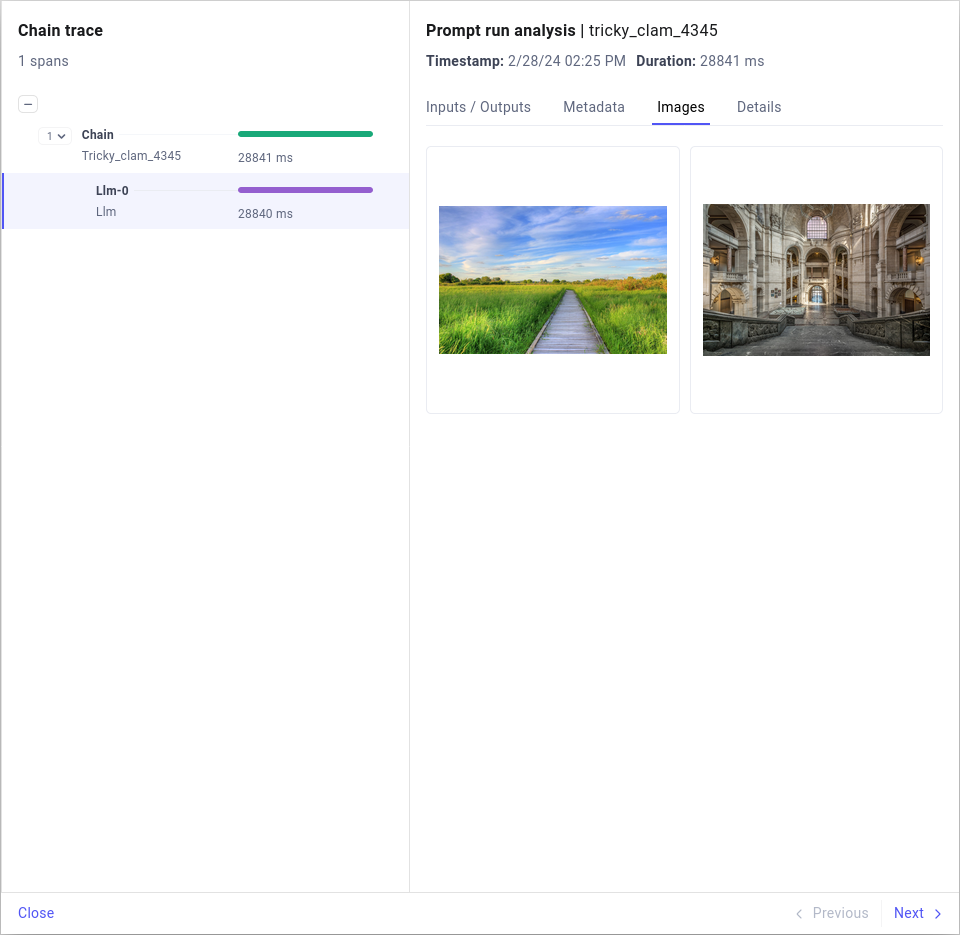